# Building a Basic NN 

## Step 1 - Loading the Dataset.

### Importing Libraries

In [1]:
#!pip install pytorch-ignite

In [2]:
import pandas as pd
import sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import random
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from torch.optim.lr_scheduler import ReduceLROnPlateau
import torchvision.transforms as transforms

In [3]:
df = pd.read_csv("F:/UB/Sem 2/Intro to Machine Learning/Assignments/Assignment 2/dataset.csv")
print(df)
print(df.dtypes)

     f1   f2  f3  f4   f5    f6     f7  target
0     6  148  72  35    0  33.6  0.627       1
1     1   85  66  29    0  26.6  0.351       0
2     8  183  64   0    0  23.3  0.672       1
3     1   89  66  23   94  28.1  0.167       0
4     0  137  40  35  168  43.1  2.288       1
..   ..  ...  ..  ..  ...   ...    ...     ...
761   9   89  62   0    0  22.5      e       0
762  10  101  76  48  180     d  0.171       0
763   2  122  70  27    b  36.8   0.34       0
764   c  121  72  23  112  26.2  0.245       0
765   1  126  60   a    0  30.1  0.349       1

[766 rows x 8 columns]
f1        object
f2        object
f3         int64
f4        object
f5        object
f6        object
f7        object
target     int64
dtype: object


### Visualization

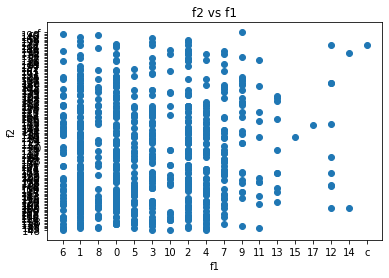

In [4]:
plt.scatter(df['f1'], df['f2'])
plt.xlabel('f1')
plt.ylabel('f2')
plt.title('f2 vs f1')
plt.show()

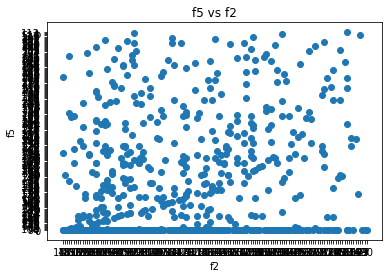

In [5]:
plt.scatter(df['f2'], df['f5'])
plt.xlabel('f2')
plt.ylabel('f5')
plt.title('f5 vs f2')
plt.show()

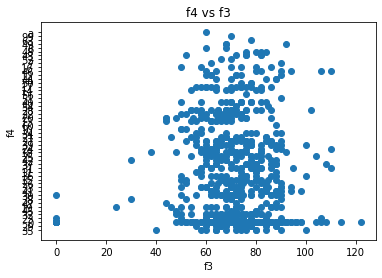

In [6]:
plt.scatter(df['f3'], df['f4'])
plt.xlabel('f3')
plt.ylabel('f4')
plt.title('f4 vs f3')
plt.show()

## Step 2 - Preprocessing the Data.

### Removing rows which has categorical values.

In [7]:
categorical_columns = ['f1', 'f2', 'f4', 'f5', 'f6', 'f7']
for i in categorical_columns:
    alpha_condition = df[i].str.contains('[a-zA-Z]')
    row_num_alpha = alpha_condition.idxmax()
    df.drop(row_num_alpha, inplace=True)

### Using Standard Scaler to scale numerical variables.

In [8]:
columns_scale = ['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7']
scaler = StandardScaler()
scaler.fit(df[columns_scale])
scaled = scaler.transform(df[columns_scale])
df_scaled = pd.DataFrame(scaled, columns=columns_scale)
df_scaled['target'] = df['target'].values
print(df_scaled)

           f1        f2        f3        f4        f5        f6        f7  \
0    0.644092  0.844637  0.148213  0.908737 -0.694636  0.202839  0.463021   
1   -0.842876 -1.123976 -0.160536  0.532503 -0.694636 -0.683852 -0.368158   
2    1.238879  1.938311 -0.263452 -1.285961 -0.694636 -1.101863  0.598540   
3   -0.842876 -0.998985 -0.160536  0.156269  0.119179 -0.493847 -0.922278   
4   -1.140270  0.500911 -1.498446  0.908737  0.759842  1.406204  5.465156   
..        ...       ...       ...       ...       ...       ...       ...   
755 -0.842876  0.219680  0.971542  1.159559  0.257700  0.570182  1.757975   
756  0.941485  0.500911  1.074458  1.284971 -0.694636  0.000167 -0.247698   
757 -1.140270  0.063441  0.148213 -1.285961 -0.694636  0.544848 -0.648230   
758 -0.842876 -0.467772  0.354045 -1.285961 -0.694636  0.696852 -0.831932   
759  0.644092  2.157046  1.177375 -1.285961 -0.694636  0.443512 -0.587999   

     target  
0         1  
1         0  
2         1  
3         0  
4    

In [9]:
print(df_scaled.dtypes)

f1        float64
f2        float64
f3        float64
f4        float64
f5        float64
f6        float64
f7        float64
target      int64
dtype: object


In [10]:
df_scaled.describe()

,f1,f2,f3,f4,f5,f6,f7,target
count,7.600000e+02,7.600000e+02,7.600000e+02,7.600000e+02,7.600000e+02,7.600000e+02,7.600000e+02,760.000000
mean,-7.756953e-17,2.278879e-17,-2.836912e-16,6.719771e-17,6.719771e-18,-1.623701e-16,1.615667e-16,0.350000
std,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00,0.477284
min,-1.140270e+00,-3.780041e+00,-3.556770e+00,-1.285961e+00,-6.946361e-01,-4.053275e+00,-1.190303e+00,0.000000
25%,-8.428760e-01,-6.865065e-01,-2.891809e-01,-1.285961e+00,-6.946361e-01,-5.951826e-01,-6.911439e-01,0.000000
50%,-2.480889e-01,-1.240456e-01,1.482128e-01,1.562691e-01,-3.829623e-01,1.666711e-04,-2.943761e-01,0.000000
75%,6.440919e-01,6.259022e-01,5.598776e-01,7.206199e-01,4.157018e-01,5.828490e-01,4.645270e-01,1.000000
max,3.915421e+00,2.438276e+00,2.721117e+00,4.921898e+00,6.629698e+00,4.446286e+00,5.862677e+00,1.000000


### Splitting the data into train and test.

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_scaled.drop('target', axis=1), df_scaled[['target']], test_size=0.2, random_state=43)

## Step 3 - Defining the Neural Network.

### Installing and importing torch

In [12]:
# !pip3 install torch 

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

### Defining the neural network.

In [14]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            # from input to first hidden layer
            nn.Linear(7, 64),
            nn.ReLU(),
            # from first hidden layer to second hidden
            nn.Linear(64, 64),
            nn.ReLU(),
            # from second hidden layer to third hidden
            nn.Linear(64, 64),
            nn.ReLU(),
            # from last hidden layer to output
            nn.Linear(64, 1),
            nn.Sigmoid()
        )  

    def forward(self, x):
        # Calling sequence defined above in __init__.
        x = self.flatten(x)
        out = self.linear_relu_stack(x)
        return out

## Step 4: Training the Neural Network.

In [15]:
X_train = torch.Tensor(X_train.values)
X_train.requires_grad_()
y_train = torch.Tensor(y_train.values)
y_train.requires_grad_()
X_test  = torch.Tensor(X_test.values)
X_test.requires_grad_()
y_test  = torch.Tensor(y_test.values)
y_test.requires_grad_()
print('\n')

In [16]:
training_dataset = TensorDataset(X_train, y_train)
evaluation_dataset = TensorDataset(X_test, y_test)
training_loader = DataLoader(training_dataset, batch_size=30, shuffle=True)
validation_loader = DataLoader(evaluation_dataset, batch_size=30, shuffle = False)

In [17]:
net = NeuralNetwork()
learning_rate = 0.011
loss_function = nn.BCELoss()
weight_optimizer = optim.SGD(net.parameters(), lr=learning_rate)
num_of_epochs = 150

In [18]:
def train_eval_loop():
    # Training and evaluating the model using for loop (without .fit).
    train_acc_lst = []
    test_acc_lst = []
    train_loss_lst = []
    test_loss_lst = []
    for epoch in range(num_of_epochs):
        training_loss = 0
        training_accuracy = 0

        # Training the Neural Network.
        net.train()
        for b_id, data in enumerate(training_loader):

            inputs, labels = data 

            # Setting weight gradients to zero for each iteration.
            weight_optimizer.zero_grad()

            # Performing the forward pass for each batch.
            outputs = net(inputs)

            # Caculating the training loss
            training_loss = loss_function(outputs, labels)

            # Performing backward pass to improve weights.
            training_loss.backward()

            # Updating the weights for better performance.
            weight_optimizer.step()

            # Calculating loss and accuracy.
            #print((outputs > 0.5).float())
            training_loss += training_loss.item() * inputs.shape[0]
            training_accuracy += ((outputs > 0.5).float() == labels).sum().item()
        training_loss /= len(X_train)
        training_accuracy /= len(X_train)
        train_acc_lst.append(training_accuracy)
        train_loss_lst.append(training_loss)
        


        # Validating on the test dataset.
        validation_loss = 0
        validation_correct = 0
        net.eval()
        with torch.no_grad():
            for inputs, labels in validation_loader:
                outputs = net(inputs)
                val_loss = loss_function(outputs, labels)
                validation_loss += val_loss.item() * inputs.shape[0]
                validation_correct += ((outputs > 0.5).float() == labels).sum().item()
        validation_loss = validation_loss/len(X_test)
        validation_accuracy = validation_correct/len(X_test)
        test_acc_lst.append(validation_accuracy)
        test_loss_lst.append(validation_loss)


    print(f'Training Accuracy = {training_accuracy}')
    print(f'Validation Accuracy = {validation_accuracy}')
    return train_acc_lst, test_acc_lst, train_loss_lst, test_loss_lst
    
# Running the function.    
train_acc_lst, test_acc_lst, train_loss_lst, test_loss_lst = train_eval_loop()

Training Accuracy = 0.7845394736842105
Validation Accuracy = 0.756578947368421


### Confusion Matrix

In [19]:
with torch.no_grad():
    y_predicted = net(X_test).round().numpy()

# Generate the confusion matrix
y_test_np = y_test.detach().numpy()
cm = confusion_matrix(y_test_np, y_predicted)
cm

array([[79, 12],
       [25, 36]], dtype=int64)

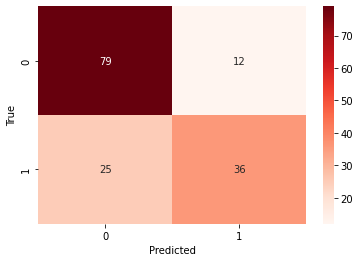

In [20]:
# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='g', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### Saving Weights

In [21]:
torch.save(net.state_dict(), 'manjuna2_pkumar32 _assignment2_part_1.pth')

### Ploting accuracy vs epochs.

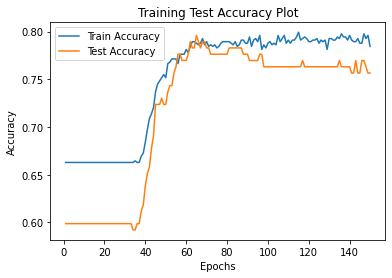

In [22]:
epoch_lst = list(range(1,num_of_epochs+1))
plt.plot(epoch_lst, train_acc_lst, label = 'Train Accuracy')
plt.plot(epoch_lst, test_acc_lst, label = 'Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Test Accuracy Plot')
plt.legend()
plt.show()

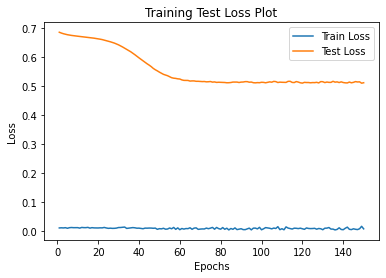

In [23]:
epoch_lst = list(range(1,num_of_epochs+1))
train_loss_lst = [x.detach() for x in train_loss_lst]
plt.plot(epoch_lst, train_loss_lst, label = 'Train Loss')
plt.plot(epoch_lst, test_loss_lst, label = 'Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Test Loss Plot')
plt.legend()
plt.show()

# Optimizing NN 

### Setup 1

In [73]:
net = NeuralNetwork()
learning_rate = 0.001
loss_function = nn.BCELoss()
weight_optimizer = optim.SGD(net.parameters(), lr=learning_rate)
num_of_epochs = 120

In [74]:
# Running the training and evaluation loop to get accuracies. 
train_acc_lst, test_acc_lst, train_loss_lst, test_loss_lst = train_eval_loop()

Training Accuracy = 0.662828947368421
Validation Accuracy = 0.5986842105263158


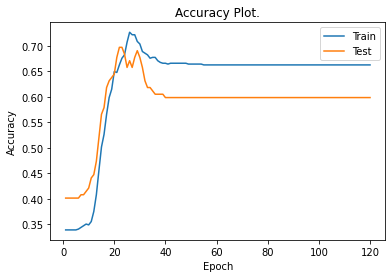

In [75]:
plt.plot(range(1,num_of_epochs+1), train_acc_lst, label = 'Train')
plt.plot(range(1,num_of_epochs+1), test_acc_lst, label = 'Test')
plt.title('Accuracy Plot.')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Setup 2

In [70]:
net = NeuralNetwork()
learning_rate = 0.016
loss_function = nn.BCELoss()
weight_optimizer = optim.Adam(net.parameters(), lr=learning_rate)
num_of_epochs = 100

In [71]:
# Running the training and evaluation loop to get accuracies. 
train_acc_lst, test_acc_lst, train_loss_lst, test_loss_lst = train_eval_loop()

Training Accuracy = 0.9194078947368421
Validation Accuracy = 0.7039473684210527


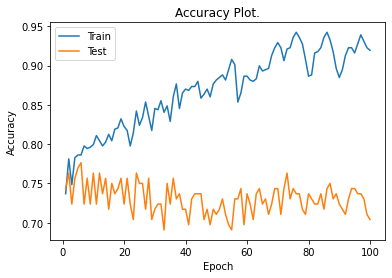

In [72]:
plt.plot(range(1,num_of_epochs+1), train_acc_lst, label = 'Train')
plt.plot(range(1,num_of_epochs+1), test_acc_lst, label = 'Test')
plt.title('Accuracy Plot.')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Setup 3

#### Changing learning rate and number of epochs.

In [62]:
net = NeuralNetwork()
learning_rate = 0.015
loss_function = nn.BCELoss()
weight_optimizer = optim.SGD(net.parameters(), lr=learning_rate)
num_of_epochs = 100

In [63]:
train_acc_lst, test_acc_lst, train_loss_lst, test_loss_lst = train_eval_loop()

Training Accuracy = 0.7976973684210527
Validation Accuracy = 0.7894736842105263


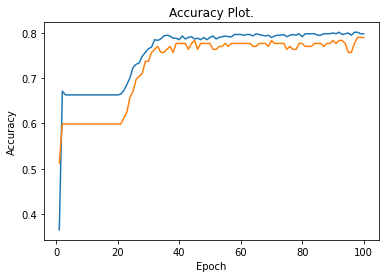

In [64]:
plt.plot(range(1,num_of_epochs+1), train_acc_lst, label = 'Train')
plt.plot(range(1,num_of_epochs+1), test_acc_lst, label = 'Test')
plt.title('Accuracy Plot.')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [65]:
base_accuracy_train = train_acc_lst
base_accuracy_test = test_acc_lst

In [76]:
torch.save(net.state_dict(), 'manjuna2_pkumar32 _assignment2_part_2.pth')

## <div align="center">Table comparing the three setups.

| Name of Setup    | Learning Rate | Optimizer | Epochs | Testing Accuracy | Training Accuracy   | 
|------------------|---------------|-----------|--------|------------------|---------------------| 
| Setup-1          | 0.001         | SGD       | 120    | 59.86%           | 66.28%              | 
| Setup-2          | 0.016         | Adam      | 100    | 70.39%           | 91.94%              | 
| Setup-3          | 0.015         | SGD       | 100    | 78.94%           | 79.76%              | 


### Have selected the 3rd model as the base model because accuracy is good for both training and test. In 2nd setup it is overfitting and accuracy is not good in first setup.

## Using diffent techniques to improve training accuracy and time.

#### Learning rate scheduling

In [77]:
net = NeuralNetwork()
learning_rate = 0.015
loss_function = nn.BCELoss()
weight_optimizer = optim.SGD(net.parameters(), lr=learning_rate)
num_of_epochs = 100
learning_scheduler = ReduceLROnPlateau(weight_optimizer, mode='min', factor=0.1, patience=20, verbose=True)

In [78]:
train_acc_lst = []
test_acc_lst = []
for epoch in range(num_of_epochs):
    training_loss = 0
    training_accuracy = 0
    
    # Training the Neural Network.
    net.train()
    for b_id, data in enumerate(training_loader):
        
        inputs, labels = data 
        
        # Setting weight gradients to zero for each iteration.
        weight_optimizer.zero_grad()
        
        # Performing the forward pass for each batch.
        outputs = net(inputs)
        
        # Caculating the training loss
        training_loss = loss_function(outputs, labels)
        
        # Performing backward pass to improve weights.
        training_loss.backward()

        # Updating the weights for better performance.
        weight_optimizer.step()
        
        # Calculating loss and accuracy.
        training_loss += training_loss.item() * inputs.shape[0]
        training_accuracy += ((outputs > 0.5).float() == labels).sum().item()
    training_loss /= len(X_train)
    training_accuracy /= len(X_train)
    train_acc_lst.append(training_accuracy)
   
    # Validating on the test dataset.
    validation_loss = 0
    validation_correct = 0
    net.eval()
    with torch.no_grad():
        for inputs, labels in validation_loader:
            outputs = net(inputs)
            val_loss = loss_function(outputs, labels)
            validation_loss += val_loss.item() * inputs.shape[0]
            validation_correct += ((outputs > 0.5).float() == labels).sum().item()
    validation_accuracy = validation_correct/len(X_test)
    validation_loss = validation_loss/len(X_test)
    test_acc_lst.append(validation_accuracy)
    learning_scheduler.step(validation_loss)
print(f'Training Accuracy = {training_accuracy}')
print(f'Validation Accuracy = {validation_accuracy}')

Epoch 00077: reducing learning rate of group 0 to 1.5000e-03.
Epoch 00098: reducing learning rate of group 0 to 1.5000e-04.
Training Accuracy = 0.7911184210526315
Validation Accuracy = 0.7631578947368421


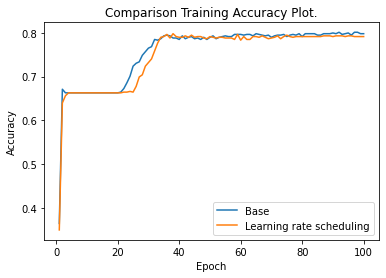

In [79]:
plt.plot(range(1,num_of_epochs+1), base_accuracy_train, label = 'Base')
plt.plot(range(1,num_of_epochs+1), train_acc_lst, label = 'Learning rate scheduling')
plt.title('Comparison Training Accuracy Plot.')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

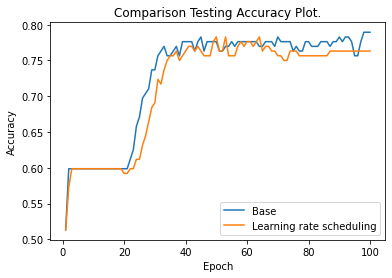

In [80]:
plt.plot(range(1,num_of_epochs+1), base_accuracy_test, label = 'Base')
plt.plot(range(1,num_of_epochs+1), test_acc_lst, label = 'Learning rate scheduling')
plt.title('Comparison Testing Accuracy Plot.')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### Early Stopping

In [81]:
net = NeuralNetwork()
learning_rate = 0.015
loss_function = nn.BCELoss()
weight_optimizer = optim.SGD(net.parameters(), lr=learning_rate)
num_of_epochs = 100

In [82]:
train_acc_lst = []
test_acc_lst = []
best_val_loss = float('inf')
count = 0
patience = 8
for epoch in range(num_of_epochs):
    training_loss = 0
    training_accuracy = 0
    
    # Training the Neural Network.
    net.train()
    for b_id, data in enumerate(training_loader):
        
        inputs, labels = data 
        
        # Setting weight gradients to zero for each iteration.
        weight_optimizer.zero_grad()
        
        # Performing the forward pass for each batch.
        outputs = net(inputs)
        
        # Caculating the training loss
        training_loss = loss_function(outputs, labels)
        
        # Performing backward pass to improve weights.
        training_loss.backward()

        # Updating the weights for better performance.
        weight_optimizer.step()
        
        # Calculating loss and accuracy.
        training_loss += training_loss.item() * inputs.shape[0]
        training_accuracy += ((outputs > 0.5).float() == labels).sum().item()
    training_loss /= len(X_train)
    training_accuracy /= len(X_train)
    train_acc_lst.append(training_accuracy)
   
    # Validating on the test dataset.
    validation_loss = 0
    validation_correct = 0
    net.eval()
    with torch.no_grad():
        for inputs, labels in validation_loader:
            outputs = net(inputs)
            val_loss = loss_function(outputs, labels)
            validation_loss += val_loss.item() * inputs.shape[0]
            validation_correct += ((outputs > 0.5).float() == labels).sum().item()
    validation_accuracy = validation_correct/len(X_test)
    validation_loss = validation_loss/len(X_test)
    test_acc_lst.append(validation_accuracy)
    
    # Early Stopping Code implemented while training and testing.
    if best_val_loss > validation_loss:
        best_val_loss = validation_loss
        count = 0
    else:
        count += 1
        if count > patience:
            print(f'Early Stopping occured at {epoch} epoch.')
            num_of_epochs = epoch
            break
    
    
print(f'Training Accuracy = {training_accuracy}')
print(f'Validation Accuracy = {validation_accuracy}')

Early Stopping occured at 75 epoch.
Training Accuracy = 0.7894736842105263
Validation Accuracy = 0.7697368421052632


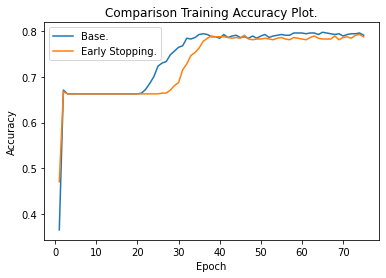

In [83]:
plt.plot(range(1,num_of_epochs+1), base_accuracy_train[:num_of_epochs], label = 'Base.')
plt.plot(range(1,num_of_epochs+1), train_acc_lst[:-1], label = 'Early Stopping.')
plt.title('Comparison Training Accuracy Plot.')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

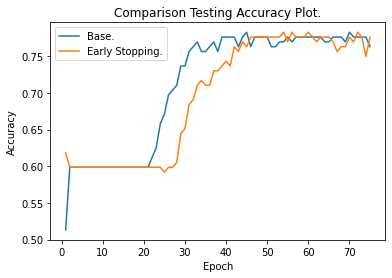

In [84]:
plt.plot(range(1,num_of_epochs+1), base_accuracy_test[:num_of_epochs], label = 'Base.')
plt.plot(range(1,num_of_epochs+1), test_acc_lst[:-1], label = 'Early Stopping.')
plt.title('Comparison Testing Accuracy Plot.')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### Weight Initialization

In [95]:
class NeuralNetwork_W(nn.Module):
    def __init__(self):
        super(NeuralNetwork_W, self).__init__()
        self.fc1 = nn.Linear(7, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        
        
        # Initializing the weights.
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        out = self.sigmoid(x)
        return out

In [96]:
net = NeuralNetwork_W()
learning_rate = 0.015
loss_function = nn.BCELoss()
weight_optimizer = optim.SGD(net.parameters(), lr=learning_rate)
num_of_epochs = 100

In [97]:
# have used defined function to train and evaluate 
train_acc_lst, test_acc_lst, train_loss_lst, test_loss_lst = train_eval_loop()

Training Accuracy = 0.8026315789473685
Validation Accuracy = 0.7697368421052632


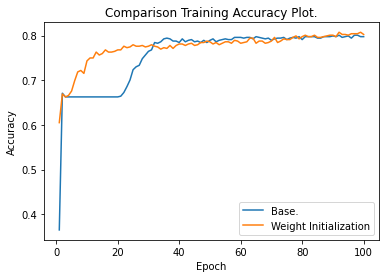

In [98]:
plt.plot(range(1,num_of_epochs+1), base_accuracy_train, label = 'Base.')
plt.plot(range(1,num_of_epochs+1), train_acc_lst, label = 'Weight Initialization')
plt.title('Comparison Training Accuracy Plot.')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

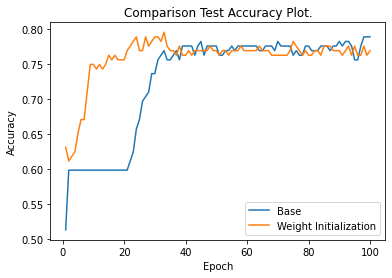

In [99]:
plt.plot(range(1,num_of_epochs+1), base_accuracy_test, label = 'Base')
plt.plot(range(1,num_of_epochs+1), test_acc_lst, label = 'Weight Initialization')
plt.title('Comparison Test Accuracy Plot.')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### Batch Normalization.

In [90]:
class NeuralNetwork_BN(nn.Module):
    def __init__(self):
        #initializing for neural network with batch normalization.
        super(NeuralNetwork_BN, self).__init__()
        self.fc1 = nn.Linear(7, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 1)
        self.bn1 = nn.BatchNorm1d(64)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        
        

    def forward(self, x):
        # defining the forward pass using batch normalization.
        x = self.fc1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.fc3(x)
        out = self.sigmoid(x)
        return out

In [91]:
net = NeuralNetwork_BN()
learning_rate = 0.015
loss_function = nn.BCELoss()
weight_optimizer = optim.SGD(net.parameters(), lr=learning_rate)
num_of_epochs = 100

In [92]:
# have used defined function to train and evaluate 
train_acc_lst, test_acc_lst, train_loss_lst, test_loss_lst = train_eval_loop()

Training Accuracy = 0.8470394736842105
Validation Accuracy = 0.7236842105263158


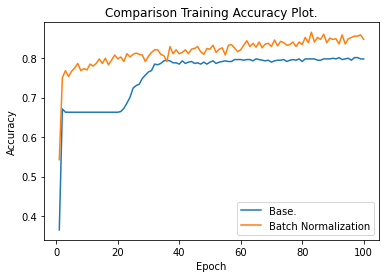

In [93]:
plt.plot(range(1,num_of_epochs+1), base_accuracy_train, label = 'Base.')
plt.plot(range(1,num_of_epochs+1), train_acc_lst, label = 'Batch Normalization')
plt.title('Comparison Training Accuracy Plot.')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

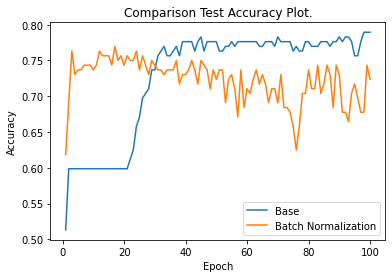

In [94]:
plt.plot(range(1,num_of_epochs+1), base_accuracy_test, label = 'Base')
plt.plot(range(1,num_of_epochs+1), test_acc_lst, label = 'Batch Normalization')
plt.title('Comparison Test Accuracy Plot.')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## References:

[1] https://pytorch.org/ignite/generated/ignite.handlers.early_stopping.EarlyStopping.html

[2]https://stackoverflow.com/questions/51677788/data-augmentation-in-pytorch

[3]https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/

[4]https://mkzia.github.io/eas503-notes/machine_learning/part1.html#splitting-data-into-train-and-test